In [33]:
import os
# from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import datetime
# import pandas as pd
import xarray as xr
from scipy import signal

In [37]:
# fileLocation = '/Users/tennismichel/Coding/Python/DLR_LIDAR/Data'
fileLocation = '../..'
# fileName = "v8combined/20200504-2141_T20Z900.nc"
fileName = "v12combined/20180106-0206_T30Z900.nc"
# fileName = "v12means.nc"
path = os.path.join(fileLocation, fileName)

In [38]:
DS = xr.open_dataset(path, decode_times=False)
DS['alt_plot'] = (DS.altitude + DS.altitude_offset + DS.station_height) / 1000 #km
DS.temperature.values = np.where(DS.temperature == 0, np.nan, DS.temperature) # Change 0 to NaN
DS

<xarray.Dataset>
Dimensions:                 (altitude: 1600, channels: 1, time: 26, value: 1)
Coordinates:
  * time                    (time) uint32 9475000 10075000 ... 23875000 24475000
  * altitude                (altitude) uint32 0 100 200 ... 159700 159800 159900
Dimensions without coordinates: channels, value
Data variables:
    station_latitude        (value) float64 ...
    station_longitude       (value) float64 ...
    station_height          (value) uint32 ...
    time_offset             (value) uint32 ...
    altitude_offset         (value) uint32 ...
    wavelength              (channels) float64 ...
    zenith_cosine           (time) float64 ...
    z0                      (time) uint32 ...
    integration_start_time  (time) uint32 ...
    integration_end_time    (time) uint32 ...
    max_countrate           (time) uint32 ...
    countrate_limit_bin     (time) uint32 ...
    merge1_top_bin          (time) uint32 ...
    merge1_bottom_bin       (time) uint32 ...
    merge1_mean_diff        (time) float32 ...
    merge2_top_bin          (time) uint32 ...
    merge2_bottom_bin       (time) uint32 ...
    merge2_mean_diff        (time) float32 ...
    temperature             (time, altitude) float32 nan nan nan ... nan nan nan
    temperature_err         (time, altitude) float32 ...
    alt_plot                (altitude, value) float64 0.0 0.1 ... 159.8 159.9
Attributes:
    title:             Lidar temperature profiles
    summary:           This file contains temperature profiles retrieved from...
    comment:           
    institution:       German Aerospace Center (DLR), Institute of Atmospheri...
    creator_name:      Bernd Kaifler
    creator_url:       http://www.dlr.de/pa
    creator_email:     bernd.kaifler@dlr.de
    cmdline:           ./CFConvert -db southwave.cfdb -c -a -o /home/bernd/co...
    version:           11
    channels_used:     532 nm, 532 nm, 608 nm
    date_created:      Mar 25 17:19:18 2020
    campaign_name:     Southwave
    station_name:      Rio Grande
    instrument_name:   CORAL
    history:           Mar 25 17:19:18 2020, file created with MELISA 1424.
    date_data_start:   Jan  6 02:37:55 2018
    snr_limit:         4.0
    background_limit:  2000.0
    signal_limit:      300000.0
    sim_runs:          100

In [36]:
DS.altitude_offset

<xarray.DataArray 'altitude_offset' (value: 1)>
array([0], dtype=uint32)
Dimensions without coordinates: value
Attributes:
    units:      meter
    long_name:  station height above WGS84

In [30]:
DS.station_height

<xarray.DataArray 'station_height' (value: 1)>
array([0], dtype=uint32)
Dimensions without coordinates: value
Attributes:
    units:      meter
    long_name:  height above WGS84

In [30]:
plt.style.use('latex_default.mplstyle')

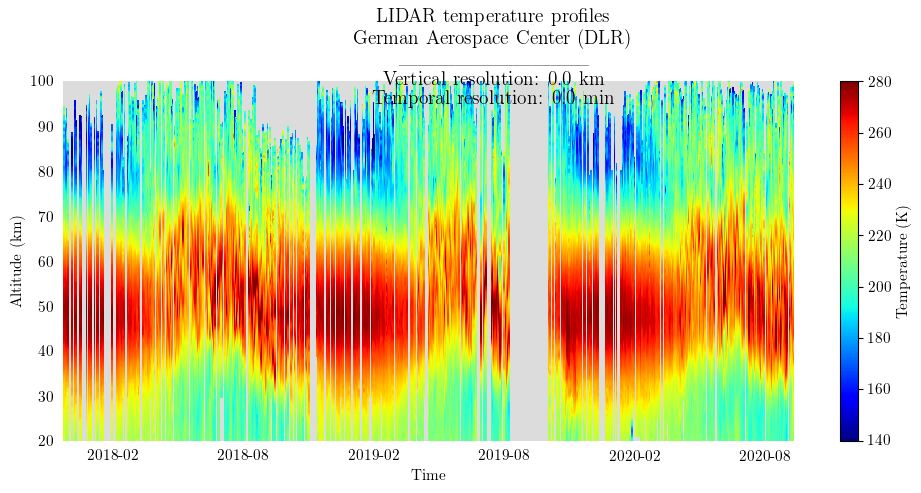

In [37]:
### PLOT ###
fig, ax0 = plt.subplots(figsize=(10,5))
im_temp = ax0.pcolormesh(DS.time, DS.alt_plot, np.matrix.transpose(DS.temperature.values),
                         cmap='jet', vmin=140, vmax=280)
ax0.set_ylim(20,100)

# Labels
cbar = fig.colorbar(im_temp, ax=ax0)
cbar.set_label('Temperature (K)')
ax0.set_xlabel('Time')
ax0.set_ylabel('Altitude (km)')

# X-Ticks
interv = mdates.MonthLocator(interval = 6)
ax0.xaxis.set_major_locator(interv)
# fmt = mdates.DateFormatter('%H:%M')
# ax0.xaxis.set_major_formatter(fmt)

# X-limits
# ax0.set_xlim(DS.date_startp.values,DS.date_endp.values)

fig.suptitle('LIDAR temperature profiles\n \
German Aerospace Center (DLR) \n \
------------------------------ \n \
Vertical resolution: {} km\n \
Temporal resolution: {} min'.format(DS.altitude.resolution / 1000, DS.time.resolution / (1000*60)), fontsize=14);
fig.tight_layout(rect=[0, 0, 1, 0.88]) # tuple (left, bottom, right, top),
# annotate() for fixed ratios